In [1]:
# Install required packages
!pip install numpy matplotlib opencv-python pillow scikit-learn

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/43/56/f92715a873187b5eff72a4a0d2ac6258e18e9bfb0e136aafde65c49a841a/pillow-10.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from 


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('C:/Users/DELL/OneDrive/Desktop/data/with_mask')
without_mask_files = os.listdir('C:/Users/DELL/OneDrive/Desktop/data/without_mask')
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [4]:
with_mask_files = os.listdir('C:/Users/DELL/OneDrive/Desktop/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [5]:
without_mask_files = os.listdir('C:/Users/DELL/OneDrive/Desktop/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [6]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [7]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [8]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [10]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


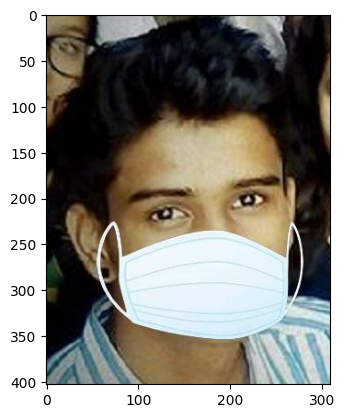

In [11]:
# Displaying with mask image

img = mpimg.imread('C:/Users/DELL/OneDrive/Desktop/data/with_mask/with_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

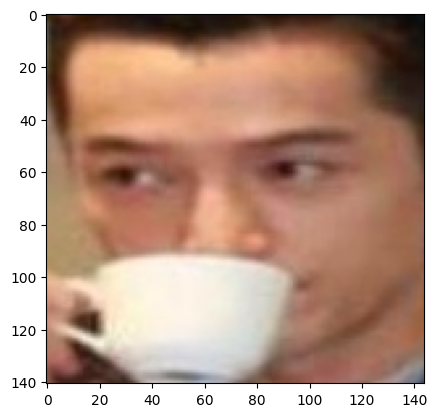

In [12]:
# Displaying without mask image

img = mpimg.imread('C:/Users/DELL/OneDrive/Desktop/data/without_mask/without_mask_1002.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

##### Resize images.

##### Convert images into numpy array.

In [14]:
import numpy as np
from PIL import Image
import os

with_mask_path = 'C:/Users/DELL/OneDrive/Desktop/data/with_mask'
with_mask_files = os.listdir(with_mask_path)

data = []

for img_file in with_mask_files:
    # Construct the correct file path using os.path.join
    image_path = os.path.join(with_mask_path, img_file)
    
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = 'C:/Users/DELL/OneDrive/Desktop/data/without_mask'
without_mask_files = os.listdir(without_mask_path)

for img_file in without_mask_files:
    # Construct the correct file path using os.path.join
    image_path = os.path.join(without_mask_path, img_file)
    
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [15]:
type(data)

list

In [16]:
len(data)

7553

In [17]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


# Train Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [29]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

# Building a Convolutional Neural Networks (CNN Model)

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5


170/170 [==============================] - 100s 380ms/step - loss: 0.5125 - acc: 0.7861 - val_loss: 0.2797 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 58s 342ms/step - loss: 0.3152 - acc: 0.8781 - val_loss: 0.2456 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 59s 349ms/step - loss: 0.2633 - acc: 0.8992 - val_loss: 0.2408 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 58s 339ms/step - loss: 0.2294 - acc: 0.9079 - val_loss: 0.2237 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 58s 341ms/step - loss: 0.1990 - acc: 0.9207 - val_loss: 0.2267 - val_acc: 0.9256


# Model Evaluation

In [48]:
# Model evaluation to find accuracy
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
accuracy_percentage = accuracy * 100
print('Test Accuracy = {:.2f}%'.format(accuracy_percentage))


48/48 [==============================] - 4s 68ms/step - loss: 0.2333 - acc: 0.9080
Test Accuracy = 90.80%


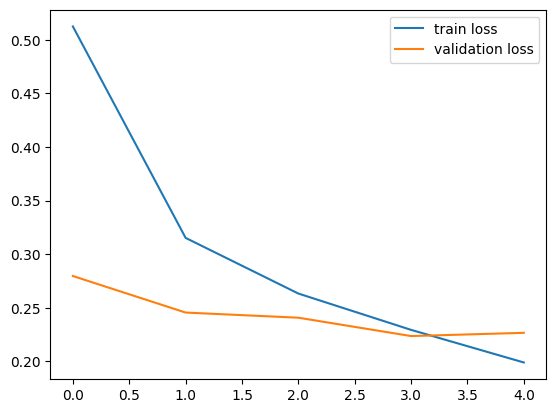

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

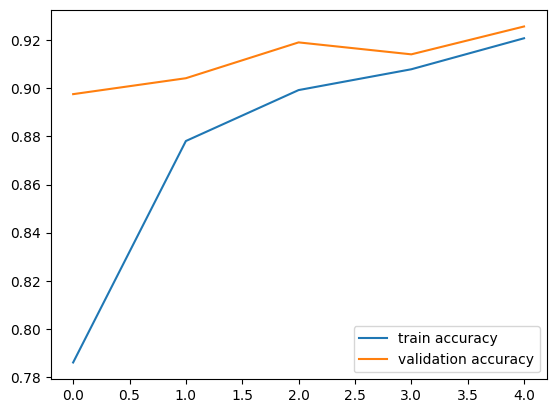

In [37]:
h = history

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

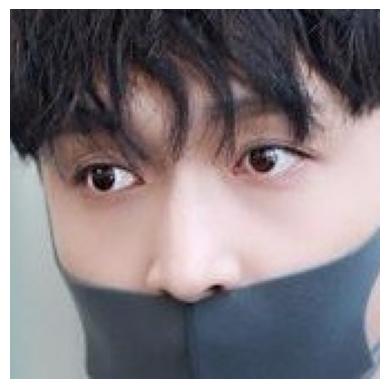

1/1 [==============================] - 0s 47ms/step
[[0.261959   0.49012166]]
1
The person in the image is wearing a mask


In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace this line with the path to your image
input_image_path = 'C:/Users/DELL/OneDrive/Desktop/data/with_mask/with_mask_1005.jpg'

input_image = cv2.imread(input_image_path)

# Display the image using plt.imshow
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Assuming 'model' is already defined and loaded
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

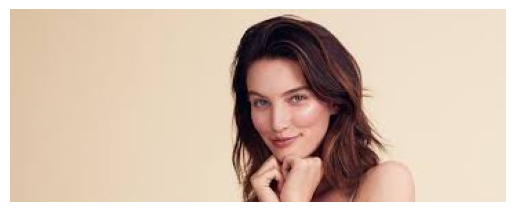

1/1 [==============================] - 0s 47ms/step
[[0.16019002 0.5074411 ]]
1
The person in the image is not wearing a mask


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace this line with the path to your image
input_image_path = 'C:/Users/DELL/OneDrive/Desktop/data/without_mask/without_mask_1010.jpg'

input_image = cv2.imread(input_image_path)

# Display the image using plt.imshow
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Assuming 'model' is already defined and loaded
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is  wearing a mask')